In [2]:
import numpy as np
from scipy import stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn

In [6]:
def calc_statistics(x):
    n = x.shape[0]  # 样本个数

    # 手动计算
    m = 0
    m2 = 0
    m3 = 0
    m4 = 0
    for t in x:
        m += t
        m2 += t*t
        m3 += t**3
        m4 += t**4
    m /= n
    m2 /= n
    m3 /= n
    m4 /= n

    mu = m
    sigma = np.sqrt(m2 - mu*mu)
    skew = (m3 - 3*mu*m2 + 2*mu**3) / sigma**3
    kurtosis = (m4 - 4*mu*m3 + 6*mu*mu*m2 - 4*mu**3*mu + mu**4) / sigma**4 - 3
    print('手动计算的均值、标准差、偏度、峰度：', mu, sigma, skew, kurtosis)

    # 使用系统函数验证
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    skew = stats.skew(x)
    kurtosis = stats.kurtosis(x)
    return mu, sigma, skew, kurtosis

In [4]:
# main function start
d = np.random.randn(10000)
print(d)
print(d.shape)

[ 0.9642483  -0.21677077 -0.75613621 ...,  0.87552022 -1.35187704
 -0.68665219]
(10000,)


In [7]:
# 一维数据
mu, sigma, skew, kurtosis = calc_statistics(d)
print('函数库计算均值、标准差、偏度、峰度：', mu, sigma, skew, kurtosis)

手动计算的均值、标准差、偏度、峰度： -0.00494232933863 1.00533773771 0.025127030206 -0.00142172042393
函数库计算均值、标准差、偏度、峰度： -0.00494232933863 1.00533773771 0.025127030206024217 -0.001421720423925965


In [15]:
# 一维直方图
mpl.rcParams['font.sans-serif'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(num=1, facecolor='w')
y1, x1, dummy = plt.hist(d, bins=50, normed=True, color='g', alpha=0.75)
t = np.arange(x1.min(), x1.max(), 0.05)
#print(t)
y = np.exp(-t**2 / 2) / math.sqrt(2*math.pi)
#print(y)
plt.plot(t, y, 'r-', lw=2)
plt.title('高斯分布，样本个数：%d' % d.shape[0])
plt.grid(True)

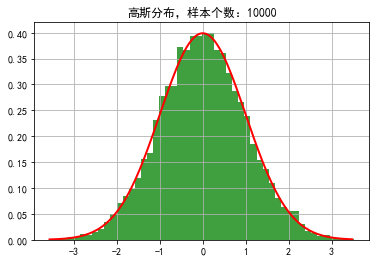

In [13]:
plt.show()

In [16]:
# 二维数据
d = np.random.randn(100000, 2)
mu, sigma, skew, kurtosis = calc_statistics(d)
print('函数库计算均值、标准差、偏度、峰度：', mu, sigma, skew, kurtosis)

手动计算的均值、标准差、偏度、峰度： [ 0.00877    -0.00066976] [ 1.00093772  0.99860574] [ 0.00791769  0.00674099] [-0.00849142 -0.00335639]
函数库计算均值、标准差、偏度、峰度： [ 0.00877    -0.00066976] [ 1.00093772  0.99860574] [ 0.00791769  0.00674099] [-0.00849142 -0.00335639]


样本总数： 100000.0
x =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
y =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


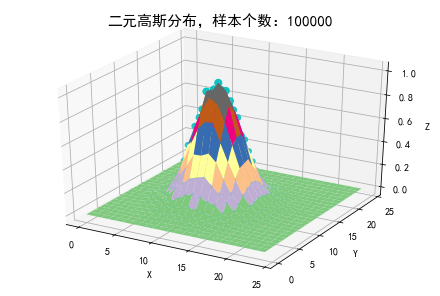

In [33]:
# 二维图像
binSize = 25
density, edges = np.histogramdd(d, bins=[binSize, binSize])
print('样本总数：', np.sum(density))

density /= density.max()
x = y = np.arange(binSize)
print('x = ', x)
print('y = ', y)

t = np.meshgrid(x, y)
#print(t)

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t[0], t[1], density, c='c', s=50*density, marker='o', depthshade=True)
ax.plot_surface(t[0], t[1], density, cmap=cm.Accent, rstride=1, cstride=1, alpha=1, lw=0.9)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('二元高斯分布，样本个数：%d' % d.shape[0], fontsize=15)
plt.tight_layout(0.3)
plt.show()